# Linear Regression w/ Diabetes Dataset
This model predicts the correlation between the sugar level and the Disease Progression after a year

<b>Explanation</b><br>
I needed to import:
- numpy because I want to use its array() and reshape()
- pandas beccuase I will work with DataFrame
- matplotlib.pyplot to plot the graph
- LinearRegression becuse I need to create an obejct with capabalities such as fit() and predict()
- train_test_split to split the dataset

In [3]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<b>Explanation</b><br>datasets.load_diabetes() returned an object and I can use this object to create a dataframe you can see here that there are 11 columns <b>but</b> since this is ML with one feature I need to drop some columns

In [4]:
# import the dataset
from sklearn import datasets
data = datasets.load_diabetes()
df = pd.DataFrame(data = data.data, columns = data.feature_names)
df['Target']  = data.target # I had a problem with this one but I just need to remember how to add key-value
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


<b>Explanation</b><br>
This is how you drop the columns

In [5]:
# You can see here that this is a dataset of multiple features but I am 
# only practicing single feature therefore we have to drop some
X = np.array(df.drop(columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 'Target']))
y = np.array(df['Target'])

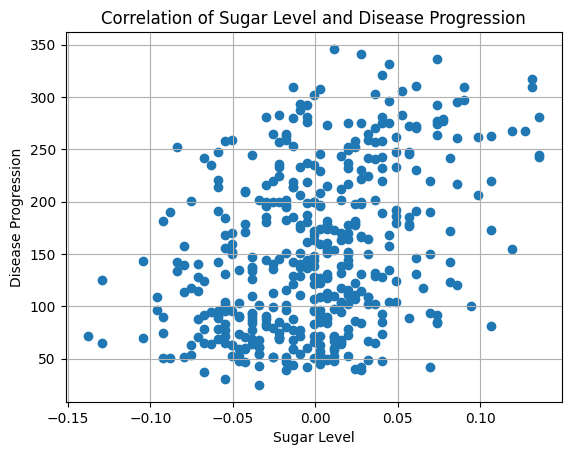

In [6]:
# plot the graph
plt.grid()
plt.scatter(X, y)
plt.title("Correlation of Sugar Level and Disease Progression")
plt.xlabel("Sugar Level")
plt.ylabel("Disease Progression")
plt.show()

<b>Explanation</b><br>
Creating the training data, and testing data

In [7]:
# create training, testing values
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state = 42, test_size = 0.2)

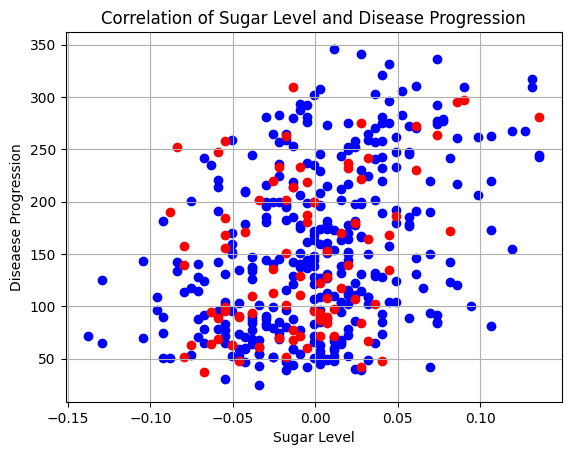

In [8]:
# plot the graph
plt.scatter(XTrain, yTrain, color = 'b', label = 'Training Data')
plt.scatter(XTest, yTest, color = 'r', label = 'Testing Data')
plt.grid()
plt.title("Correlation of Sugar Level and Disease Progression")
plt.xlabel("Sugar Level")
plt.ylabel("Diseaese Progression")
plt.show()

<b>Explanation</b><br>
Train the dataset

In [9]:
# create a model
model = LinearRegression()
model.fit(XTrain.reshape(-1, 1), yTrain)

LinearRegression()

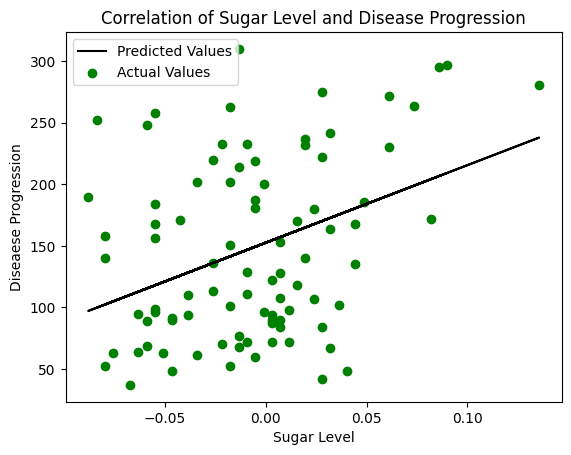

In [10]:
# use the model with the test data
predictTest = model.predict(XTest.reshape(-1, 1))
plt.plot(XTest, predictTest, label = 'Predicted Values', color = 'black')
plt.scatter(XTest, yTest, label = 'Actual Values', color = 'green')
plt.legend()
plt.title("Correlation of Sugar Level and Disease Progression")
plt.xlabel("Sugar Level")
plt.ylabel("Diseaese Progression")
plt.show()

<b>Explanation</b><br>
Predicting a y value with an x value

In [11]:
# predicting the new given value
newValue = model.predict([[0.08]])
print(newValue)

[202.93373826]


In [12]:
from sklearn.metrics import r2_score
print(r2_score(yTest, predictTest))

0.11003673084081


It is a bad regression